In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [9]:
def ConvertCV(foldperf):
    testl_f = np.zeros((5,80))
    tl_f= np.zeros((5,80))
    testa_f= np.zeros((5,80))
    ta_f= np.zeros((5,80))
    k=5
    for f in range(1,k+1):
        tl_f[f-1,:] = foldperf['fold{}'.format(f)]['train_loss']
        ta_f[f-1,:] = foldperf['fold{}'.format(f)]['train_acc']
        testl_f[f-1,:]=foldperf['fold{}'.format(f)]['test_loss']
        testa_f[f-1,:]=foldperf['fold{}'.format(f)]['test_acc']
    cv_test_l = np.mean(testl_f,axis=0) 
    cv_test_ac = np.mean(testa_f,axis=0) 
    cv_train_l = np.mean(tl_f,axis=0) 
    cv_train_ac = np.mean(ta_f,axis=0) 
    return cv_train_l, cv_test_l, cv_train_ac, cv_test_ac

In [10]:
# freq best = Adam_0.000189341200201022.pkl
# raw best = rawAdam_0.00017401028619278415.pkl

In [11]:
LearningRates

['/Users/jiayihan/Documents/FinalOptuna/raw/rawAdam_0.0001439737018377692.pkl',
 '/Users/jiayihan/Documents/FinalOptuna/raw/rawAdam_0.00015009271945579756.pkl',
 '/Users/jiayihan/Documents/FinalOptuna/raw/rawAdam_0.0001984943119311516.pkl',
 '/Users/jiayihan/Documents/FinalOptuna/raw/rawAdam_0.00019007931364539745.pkl',
 '/Users/jiayihan/Documents/FinalOptuna/raw/rawAdam_0.00013555946903909003.pkl',
 '/Users/jiayihan/Documents/FinalOptuna/raw/rawAdam_0.00016696992050620654.pkl',
 '/Users/jiayihan/Documents/FinalOptuna/raw/rawAdam_0.0001732216573623963.pkl',
 '/Users/jiayihan/Documents/FinalOptuna/raw/rawAdam_0.00010256149513541914.pkl']

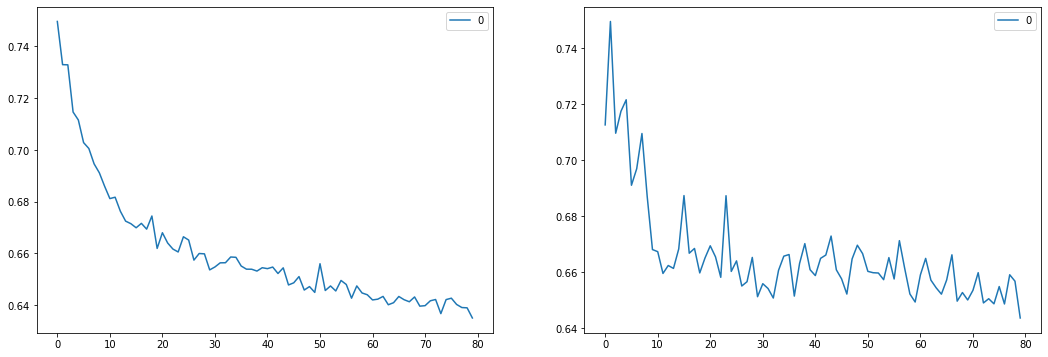

In [26]:
fig=plt.figure(figsize=(18,6))
LearningRates = glob.glob("/Users/jiayihan/Documents/FinalOptuna/freq/Adam_0.00010612570739516776.pkl")
legends = []
plt.subplot(1,2,1)
p = 0
for path in LearningRates:
    a_file = open(path, "rb")
    foldperf= pickle.load(a_file)
    cv_train_l, cv_test_l, _, _ = ConvertCV(foldperf) 
    plt.plot(cv_train_l)
    legends.append(p)
    p+=1
plt.legend(legends)    
plt.subplot(1,2,2)
mins =[]
for path in LearningRates:
    a_file = open(path, "rb")
    foldperf= pickle.load(a_file)
    cv_train_l, cv_test_l, _, _ = ConvertCV(foldperf) 
    plt.plot(cv_test_l)
    mins.append(np.min(cv_test_l))
plt.legend(legends)        